#### Pour que l'apprentissage par ML soit faisable, on sélectionne les **catégories significatives** avec un "grand" nombre d'exposés des faits associé.

In [64]:
import pandas as pd
import operator
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

## Chargement des données pré-traîtées

Ci-dessous, **efs** est un DataFrame.
L'argument header=0 indique que les noms des colonnes se trouvent sur la première ligne (d'indice 0).

In [2]:
efs = pd.read_csv('/home/alina/UNIFR/TM/random/ExposesDesFaits/exposes_faits_preproc_fin.csv', header=0, sep=';')
efs.head(5)

,EXPOSES,CATEGORIE
0,Une trace de mazout sur env 20 mètres. Pompier...,POLLUTION - HYDROCARBURES
1,avis prudence météo,FEUX A ECLIPSES - 45 TOURS
2,Un renard sur la voie gauche.,ANIMAUX
3,Interpellation de M. Ndue GESHTEJA,INDIVIDU - RECHERCHE
4,Bras cassé suite glissade sur le verglas.,DEMANDE - D'AMBULANCE


In [3]:
efs.loc[4]

EXPOSES      Bras cassé suite glissade sur le verglas.
CATEGORIE                        DEMANDE - D'AMBULANCE
Name: 4, dtype: object

In [4]:
efs.loc[4,:]

EXPOSES      Bras cassé suite glissade sur le verglas.
CATEGORIE                        DEMANDE - D'AMBULANCE
Name: 4, dtype: object

In [5]:
efs.loc[4][1]

"DEMANDE - D'AMBULANCE"

**ser_cats** correspond aux catégories de tous les enregistrements (donc les éléments de la colonne CATEGORIE) de la DataFrame **efs** en tant qu'objet de type **pandas.core.series.Series**

In [6]:
ser_cats = efs['CATEGORIE']
#ser_cats = efs.CATEGORIE
print(type(ser_cats))

<class 'pandas.core.series.Series'>


**l_cats** est la liste de strings correspondant à la Series **ser_cats**

In [7]:
l_cats = list(ser_cats)
print(len(l_cats))
l_cats[0:5:1]

158058


['POLLUTION - HYDROCARBURES',
 'FEUX A ECLIPSES - 45 TOURS',
 'ANIMAUX',
 'INDIVIDU - RECHERCHE',
 "DEMANDE - D'AMBULANCE"]

#### Les catégories SANS doublons comme set et liste

On transforme la Series **ser_cats** en un set nommé **set_cats** pour éliminer les doublons

In [8]:
set_cats = set(ser_cats)
print(type(set_cats))
print(len(set_cats))
#for cat in set_cats:
#    print(cat)

<class 'set'>
421


On transforme le set **set_cats** en une liste **l_set_cats** où on trouve les catégories (sans doublons) dans un ordre quelconque

In [9]:
l_set_cats = list(set_cats)
print(len(l_set_cats))
l_set_cats[:10]

421


['PANNE - TECHNIQUE',
 'PERTURBATION - RADIO',
 'DISPARITION - MILITAIRE',
 'MANIFESTATION',
 'PANNE - TELEPHONE',
 'DANGERS',
 "VOL - A L'ETALAGE",
 'HOLD-UP',
 'MUNITION / EXPLOSIF',
 'PIEGE - PIEGES SMS-GTM - 140  - Alarmes piège']

**ser_exposes** correspond aux exposés de tous les enregistrements (donc les éléments de la colonne EXPOSES) de la DataFrame **efs** en tant qu'objet de type **pandas.core.series.Series**

In [10]:
ser_exposes = efs['EXPOSES']
#ser_cats = efs.EXPOSES
print(type(ser_exposes))

<class 'pandas.core.series.Series'>


**l_exposes** est la liste de strings correspondant à la Series **ser_exposes**

In [11]:
l_exposes = list(ser_exposes)
print(len(l_exposes))
l_exposes[0:5:1]

158058


['Une trace de mazout sur env 20 mètres. Pompiers se déplacent. ',
 'avis prudence météo',
 'Un renard sur la voie gauche.',
 'Interpellation de M. Ndue GESHTEJA',
 'Bras cassé suite glissade sur le verglas.']

#### Les exposés SANS doublons comme set et liste

On transforme la Series **ser_exposes** en un set nommé **set_exposes** pour éliminer les doublons

In [12]:
set_exposes = set(ser_exposes)
print(type(set_exposes))
print(len(set_exposes))
#for expo in set_exposes:
#    print(expo)

<class 'set'>
129467


On transforme le set **set_exposes** en une liste **l_set_exposes** où on trouve les catégories (sans doublons) dans un ordre quelconque

In [13]:
l_set_exposes = list(set_exposes)
print(len(l_set_exposes))
l_set_exposes[:10]

129467


["L'informateur a entendu le bruit d'une fenêtre qui s'ouvre et voit de la lumière chez ses voisins (JAQUIER). Pensent qu'ils sont absents car il n'y a pas de voiture devant le domicile.",
 "de la fumée blanche sort de la cabine d'un camion anglais. ",
 "Avise que son employée, Mme Jerpar BYRDE l'a contactée pour lui dire qu'elle a été enfermée sur le balcon par son mari, M. Cédric BYRDE. Ce dernier est ivre. Couple en instance de séparation.",
 '1 auto, dans la forêt, après une perte de maîtrise. Elève conducteur accompagné, pas de blessé. Chaussée pas obstruée.',
 "Bruit de musique provenant d'un appartement situé sous le foyer.",
 '1 chat mâle roux, 1 an, puce n° 756098100736947, collier rouge avec une clochette. A disparu du domicile depuis le 19 septembre',
 'OP GUCCI 7 véhicules et 9 inspecteur avec DARD interpellation possible',
 'A retrouvé dans sa cave des effets dans un sac. Des livres ainsi qu\'un pantalon. "Inscription Bellechasse"',
 'Entend de la musique depuis 20min deva

## Catégories comme nouveaux DataFrame

On peut obtenir un nouveau DataFrame correspondant seulement aux enregistrements dont la CATEGORIE a une certaine valeur.

On considère par exemple la catégorie d'indice 4 dans la liste des catégories sans doublons **l_set_cats**.

In [14]:
l_set_cats[4]

'PANNE - TELEPHONE'

Les indices des enregistrements dans la DataFrame globale **efs** correspondant aux enregistrements dont la catégorie a une certaine valeur, dans cet exemple la catégorie d'indice 22 dans la liste des catégories sans doublons **l_set_cats**.

In [15]:
indices_4 = efs.index[efs['CATEGORIE']==l_set_cats[4]].tolist()
print(len(indices_4))
indices_4[0:10]

10


[5537, 48530, 59980, 65313, 69535, 92350, 96090, 100731, 121584, 141266]

Le nouveau DataFrame contenant seulement les enregistrements dont la CATEGORIE a une certaine valeur.

In [16]:
efs_categorie_4 = efs.loc[efs['CATEGORIE']==l_set_cats[4]]
print(len(efs_categorie_4))
efs_categorie_4.head(3)

10


,EXPOSES,CATEGORIE
5537,Perturbation >> réseau téléphonique à l'intern...,PANNE - TELEPHONE
48530,Le CET nous avise que le 144 et le CTA sont in...,PANNE - TELEPHONE
59980,Saga et Saga Mobile out dès 1900.,PANNE - TELEPHONE


In [17]:
type(efs['CATEGORIE']==l_set_cats[4])

pandas.core.series.Series

In [18]:
efs_categorie_4.reset_index(inplace=True, drop=True)
efs_categorie_4.head(3)

,EXPOSES,CATEGORIE
0,Perturbation >> réseau téléphonique à l'intern...,PANNE - TELEPHONE
1,Le CET nous avise que le 144 et le CTA sont in...,PANNE - TELEPHONE
2,Saga et Saga Mobile out dès 1900.,PANNE - TELEPHONE


In [19]:
l_set_cat_tri = sorted(l_set_cats)
l_set_cat_tri[:5]

['ABUS - DE CONFIANCE',
 'ABUS - DU TELEPHONE',
 'ACCIDENT',
 'ACCIDENT - AVEC DES EXPLOSIFS',
 "ACCIDENT - D'ASCENCEUR"]

## Exposés comme nouveaux DataFrame

On peut obtenir un nouveau DataFrame correspondant seulement aux enregistrements dont la colonne EXPOSES a une certaine valeur.

On considère par exemple l'exposé d'indice 12122 dans la liste des exposés sans doublons **l_set_exposes**.

In [20]:
l_set_exposes[12122]

'une bagarre entre 4-5 personnes. '

Les indices des enregistrements dans la DataFrame globale **efs** correspondant aux enregistrements dont l'exposé a une certaine valeur, dans cet exemple l'exposé d'indice 4 dans la liste des exposés sans doublons **l_set_exposes**.

In [21]:
indices_exposes_12122 = efs.index[efs['EXPOSES']==l_set_exposes[12122]].tolist()
print(len(indices_exposes_12122))
indices_exposes_12122[0:10]

3


[42554, 42555, 42557]

Le nouveau DataFrame contenant seulement les enregistrements dont la colonne EXPOSES a une certaine valeur.

In [22]:
efs_exposes_12122 = efs.loc[efs['EXPOSES']==l_set_exposes[12122]]
print(len(efs_exposes_12122))
efs_exposes_12122.head()

3


,EXPOSES,CATEGORIE
42554,une bagarre entre 4-5 personnes.,ARMES
42555,une bagarre entre 4-5 personnes.,BAGARRE
42557,une bagarre entre 4-5 personnes.,APPREHENSION / ARRESTATION


In [23]:
type(efs['EXPOSES']==l_set_exposes[12122])

pandas.core.series.Series

In [24]:
efs_exposes_12122.reset_index(inplace=True, drop=True)
efs_exposes_12122.head()

,EXPOSES,CATEGORIE
0,une bagarre entre 4-5 personnes.,ARMES
1,une bagarre entre 4-5 personnes.,BAGARRE
2,une bagarre entre 4-5 personnes.,APPREHENSION / ARRESTATION


In [25]:
l_set_exposes_tri = sorted(l_set_exposes)
l_set_exposes_tri[:5]

['     swiss auto trader',
 "  c/o SUBITHA YOGANANTHARAJAH au 3ème étage L'informatrice a été témoin de violences dans le couple. La victime est enfermée dans une pièce. Le mari est toujours sur place. Situation calme.",
 " 1 RA, pour des habits, pour un montant dépassant CHF 1000.- Il n'est pas encore en violation de domicile !",
 ' 1 auto sur BAU ouverte en train de changer une roue.',
 ' 1 panneau de signalisation a été couché au milieu du giratoire.']

## Dictionnaires

Par la suite, on va travailler avec un dictionnaire **dico** dont les éléments sont des couples où la clé est une catégorie et la valeur est une liste de strings correspondant aux exposés des faits associés à cette catégorie.

La fonction **show** affiche les **n_cats** premiers couples d'un dictionnaire et pour chaque couple affiche sa catégorie et les **n_expos** exposés des faits associés à cette catégorie.

In [26]:
def show(dictionnaire, n_cats, n_expos):
    i=0
    for cat,expos in dictionnaire.items():
        j=0
        print(cat,end='\n***************\n')
        for expo in expos:
            print(expo,end='\n----------------\n')
            j+=1
            if j == n_expos:
                break 
        i+=1
        if i == n_cats:
            break

**l_efs_par_cat** est une liste des DataFrame où chaque DataFrame a la même valeur pour la colonne catégorie

In [27]:
l_efs_par_cat = []
for cat in l_set_cats:
    df = efs.query('CATEGORIE == @cat', inplace=False)
    #df.drop(['index'], axis=1, inplace=True)
    df.reset_index(inplace=True, drop=True)
    l_efs_par_cat.append(df)
print(len(l_efs_par_cat))
print(type(l_efs_par_cat[22]))
print(l_efs_par_cat[4][0:3])
print(l_efs_par_cat[20][0:3])
#l_efs_par_cat[22].head()
#l_efs_par_cat[22]
#print(l_efs_par_cat)

421
<class 'pandas.core.frame.DataFrame'>
                                             EXPOSES          CATEGORIE
0  Perturbation >> réseau téléphonique à l'intern...  PANNE - TELEPHONE
1  Le CET nous avise que le 144 et le CTA sont in...  PANNE - TELEPHONE
2                  Saga et Saga Mobile out dès 1900.  PANNE - TELEPHONE
     EXPOSES                                          CATEGORIE
0  AGRESSION  ALARME AGRESSION - 421796 - 2  - BUCHERER S.A....
1  AGRESSION  ALARME AGRESSION - 421796 - 2  - BUCHERER S.A....
2  AGRESSION  ALARME AGRESSION - 421796 - 2  - BUCHERER S.A....


On crée le dictionnaire **dico_cat_lExpos** qui a comme clés les catégories distinctes et comme valeurs des listes avec les exposés des faits correspondants (à chaque clé-catégorie, on associe la valeur-liste avec ses exposés des faits).

In [28]:
dico_cat_lExpos = {}
for df in l_efs_par_cat:
    dico_cat_lExpos[df['CATEGORIE'][0]] = list(df['EXPOSES'].values)[:]
print('Le nombre de clefs/catégories : ',len(list(dico_cat_lExpos.keys())), '\n')
show(dico_cat_lExpos,5,3)

Le nombre de clefs/catégories :  421 

PANNE - TECHNIQUE
***************
plus possible de se mettre en conférence sur la ligne 058.262.07.33 dédiée aux conférences entre CS, Chef UGM et CET
----------------
ZSE HS
----------------
Panne informatique du "vd.ch". Demande le piquet DSI
----------------
PERTURBATION - RADIO
***************
Panne prescom
----------------
A 2 reprises, les Prescom ont "lâchés" puis la configuration a repris. De plus, les patrouilles PS auraient aussi des pertes de connexion. 
----------------
Coupure Polycom dès 0830 pour des raisons de maintenance. Durée prévue jusque vers 1100. L'ensemble des communications radio se fera sur l'IDR33.
----------------
DISPARITION - MILITAIRE
***************
le soldat WÄLCHLI n'est pas entré en service à l'heure prévue à la caserne de Lyss. A contacté son Cdt de compagnie vers minuit avec le Natel d'un passant disant qu'il était en gare de Lausanne et avait loupé sa correspondance. Plus de nouvelles depuis. Police militaire 

**dico_cat_nbExpos** est un dictionnaire dont les clés sont les catégories et les valeurs sont les nombres d'exposés par catégories

In [29]:
dico_cat_nbExpos = {}
for key,value in dico_cat_lExpos.items():
    #print(key, ' ', len(value))
    dico_cat_nbExpos[key] = len(value)

On peut afficher les catégories avec les nombres d'exposés associés à chacune d'entre elles en ordre décroissant

In [30]:
for key,value in sorted(dico_cat_nbExpos.items(), key=operator.itemgetter(1), reverse=True):
    print(key,'   ', value)

DEMANDE - D'ASSISTANCE     17968
TAPAGE NOCTURNE     7182
ACCIDENT - DE CIRCULATION - DEGATS MATERIEL     7091
ANIMAUX     6847
VOL - PAR EFFRACTION     6657
AR - DIVERS     5617
INDIVIDU - SUSPECT     5261
INFRACTION - LCR     5141
INDIVIDU - PERTURBE     4727
AR - PANNE - VEHICULE     3318
OPERATION     3149
DOMMAGES - A LA PROPRIETE     2867
APPREHENSION / ARRESTATION     2510
BAGARRE     2496
CIRCULATION - ROUTIERE     2447
AR - ACCIDENT     2337
REVOCATION     2317
LITIGE     2296
MINEUR - IMPLIQUE     2287
INDESIRABLE     2265
ACCIDENT - DE CIRCULATION - AVEC FUITE     2213
VEHICULE - SUSPECT     2199
INCENDIE     2085
ACCIDENT - DE CIRCULATION - AVEC BLESSE     1960
VOL     1918
DROGUE     1813
ACCIDENT - DE CIRCULATION - AVEC ANIMAL     1714
DEMANDE - D'AMBULANCE     1662
VOL - A L'ETALAGE     1611
FUITE - D'UN LIEU DE PLACEMENT     1466
VIOLENCE - DOMESTIQUE     1437
TENTATIVE     1369
COLLABORATION - INTERPOLICE     1340
DEMANDE - IDENTIFICATION     1262
VEHICULE     1164
TRO

On peut afficher les catégories avec les nombres d'exposés associés qui se trouvent dans une plage donnée en ordre décroissant

In [37]:
nb_cats = 0
val_min = 1000
val_max = 100000
nb_expos_tot_plage = 0
for key,value in sorted(dico_cat_nbExpos.items(), key=operator.itemgetter(1), reverse=True):
    if value >= val_min and value <= val_max: 
        print(key,'   ', value)
        nb_cats+=1
        nb_expos_tot_plage+=value
print('Nombre catégories dans la plage : ', nb_cats)
print('Nombre total d\'exposés dans la plage : ', nb_expos_tot_plage)

DEMANDE - D'ASSISTANCE     17968
TAPAGE NOCTURNE     7182
ACCIDENT - DE CIRCULATION - DEGATS MATERIEL     7091
ANIMAUX     6847
VOL - PAR EFFRACTION     6657
AR - DIVERS     5617
INDIVIDU - SUSPECT     5261
INFRACTION - LCR     5141
INDIVIDU - PERTURBE     4727
AR - PANNE - VEHICULE     3318
OPERATION     3149
DOMMAGES - A LA PROPRIETE     2867
APPREHENSION / ARRESTATION     2510
BAGARRE     2496
CIRCULATION - ROUTIERE     2447
AR - ACCIDENT     2337
REVOCATION     2317
LITIGE     2296
MINEUR - IMPLIQUE     2287
INDESIRABLE     2265
ACCIDENT - DE CIRCULATION - AVEC FUITE     2213
VEHICULE - SUSPECT     2199
INCENDIE     2085
ACCIDENT - DE CIRCULATION - AVEC BLESSE     1960
VOL     1918
DROGUE     1813
ACCIDENT - DE CIRCULATION - AVEC ANIMAL     1714
DEMANDE - D'AMBULANCE     1662
VOL - A L'ETALAGE     1611
FUITE - D'UN LIEU DE PLACEMENT     1466
VIOLENCE - DOMESTIQUE     1437
TENTATIVE     1369
COLLABORATION - INTERPOLICE     1340
DEMANDE - IDENTIFICATION     1262
VEHICULE     1164
TRO

**main_dico_cat_lExpos** est un dictionnaire dont les clés sont les catégories distinctes **avec plus de 1000 exposés associés** et les valeurs sont des listes d'exposés associés à ces catégories

**l_main_cats** est une liste avec les catégories principales, i.e. avec plus de 1000 exposés associés

**l_main_nbExpos** est la liste avec le nombre d'exposés par catégorie principale (dans le même ordre que les catégories de la liste l_main_cats)

In [51]:
main_dico_cat_lExpos = {}
l_main_cats = []
val_min = 1000
val_max = 100000
nb_expos_tot_plage = 0
l_main_nbExpos = []
for key,value in sorted(dico_cat_nbExpos.items(), key=operator.itemgetter(1), reverse=True):
    if value >= val_min and value <= val_max: 
        #main_dico_cat_lExpos[key] = dico_cat_lExpos[key]
        #grâce au [:], on fait ci-dessous une copie indépendante
        main_dico_cat_lExpos[key] = dico_cat_lExpos[key][:]
        l_main_cats.append(key)
        l_main_nbExpos.append(value)
        nb_expos_tot_plage+=value
print('Le nombre de catégories dans le main_dico_cat_lExpos : ' + str(len(main_dico_cat_lExpos)) + '\n')
print('Nombre total d\'exposés dans le main_dico_cat_lExpos : ' + str(nb_expos_tot_plage) + '\n')
print(l_main_cats, '\n')
print(l_main_nbExpos, '\n')
#print(l_main_cats[0], '\n')
#show(main_dico_cat_lExpos, 40, 1)

Le nombre de catégories dans le main_dico_cat_lExpos : 37

Nombre total d'exposés dans le main_dico_cat_lExpos : 122204

["DEMANDE - D'ASSISTANCE", 'TAPAGE NOCTURNE', 'ACCIDENT - DE CIRCULATION - DEGATS MATERIEL', 'ANIMAUX', 'VOL - PAR EFFRACTION', 'AR - DIVERS', 'INDIVIDU - SUSPECT', 'INFRACTION - LCR', 'INDIVIDU - PERTURBE', 'AR - PANNE - VEHICULE', 'OPERATION', 'DOMMAGES - A LA PROPRIETE', 'APPREHENSION / ARRESTATION', 'BAGARRE', 'CIRCULATION - ROUTIERE', 'AR - ACCIDENT', 'REVOCATION', 'LITIGE', 'MINEUR - IMPLIQUE', 'INDESIRABLE', 'ACCIDENT - DE CIRCULATION - AVEC FUITE', 'VEHICULE - SUSPECT', 'INCENDIE', 'ACCIDENT - DE CIRCULATION - AVEC BLESSE', 'VOL', 'DROGUE', 'ACCIDENT - DE CIRCULATION - AVEC ANIMAL', "DEMANDE - D'AMBULANCE", "VOL - A L'ETALAGE", "FUITE - D'UN LIEU DE PLACEMENT", 'VIOLENCE - DOMESTIQUE', 'TENTATIVE', 'COLLABORATION - INTERPOLICE', 'DEMANDE - IDENTIFICATION', 'VEHICULE', 'TROUBLE - DE LA TRANQUILLITE / NUISANCE', 'BRUIT'] 

[17968, 7182, 7091, 6847, 6657, 5617, 

On représente les catégories principales avec le nombre d'exposés des faits associés

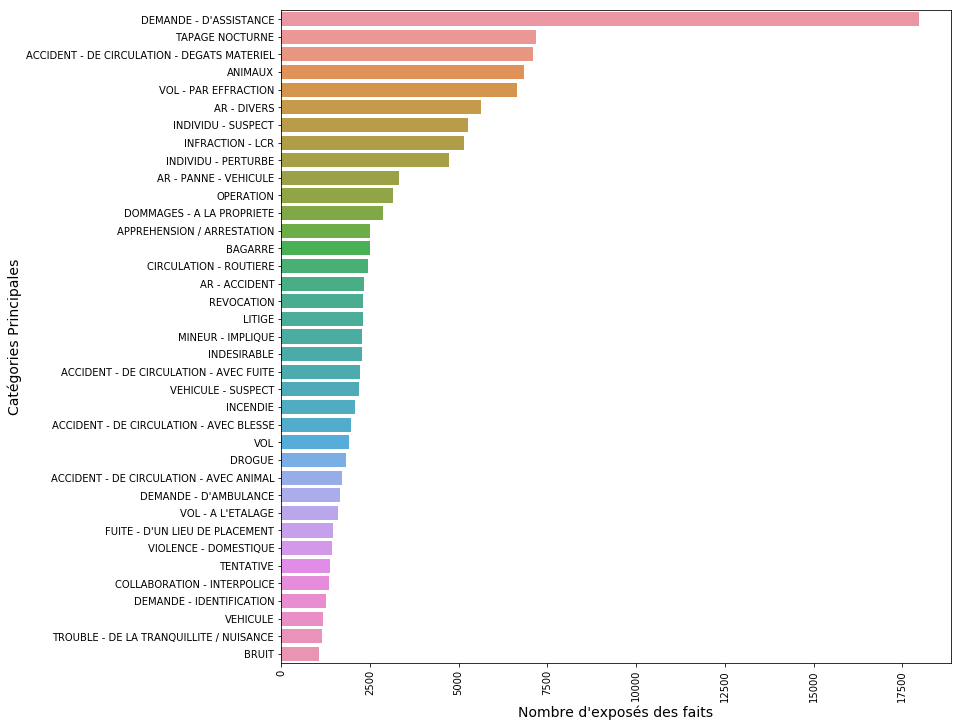

In [76]:
plt.figure(figsize=(12,12))
sns.barplot(l_main_nbExpos, l_main_cats, alpha=1)
plt.ylabel('Catégories Principales', fontsize=14)
plt.xlabel('Nombre d\'exposés des faits', fontsize=14)
plt.xticks(rotation=90)
plt.show();

# Nouveau

**l_couples_expo_cat** est une liste de couples où le premier élément d'un couple est un exposé des faits et le deuxième élément du même couple est la catégorie associée à cet exposé des faits (pour les catégories ayant plus de 1000 edf associés et qui seront stockées dans la liste **l_main_cats_bis**)

In [52]:
l_couples_expo_cat = []
l_main_cats_bis = []
for cat,expos in main_dico_cat_lExpos.items():
    for expo in expos:
        l_couples_expo_cat.append((expo,cat))
    l_main_cats_bis.append(cat)
print(len(l_couples_expo_cat), '\n')
l_couples_expo_cat[91111:91114]

122204 



[("Voit un petit garçon (capuche blanche, pantalon noir) en train de pleurer. A l'air perdu",
  'MINEUR - IMPLIQUE'),
 ("Jade FELBER, 21.01.2002 sign : 170 cm corp normale, pantalon training rouge PUMA et haut noir, cheveux longs châtains non attachés et boucles d'oreille. Vient de quitter son domicile dans un état d'agressivité avancé suite à un conflit avec sa mère. Peut se mettre en danger. ",
  'MINEUR - IMPLIQUE'),
 ("les jumeaux GOMES FERNANDES Micael et Michel, 1999, ont disparu du domicile de leur belle-mère VARELA Marie-José, depuis 2 jours. Doivent rejoindre la Fondation Verdeil lundi matin. Ces ados sont sous tutelle. La belle-mère inquiète a pris contact avec M. Gumy, directeur de la Fondation Verdeil qui fait appel à nos services. N'ont pas de problème de santé. ",
  'MINEUR - IMPLIQUE')]

**l_couples_expo_noCat** est une liste de couples où le premier élément d'un couple est un exposé des faits et le deuxième élément du même couple est l'indice de la catégorie associée à cet exposé des faits (et avec cet indice on peut trouver le nom de la catégorie comme l'élément ayant cet indice dans la liste **l_main_cats_ter** qui est la liste contenant les nom des catégories principales - avec plus de 1000 edf)

In [53]:
l_couples_expo_noCat = []
l_main_cats_ter = []
noCat = 0
for cat,expos in main_dico_cat_lExpos.items():
    for expo in expos:
        l_couples_expo_noCat.append((expo,noCat))
    l_main_cats_ter.append(cat)
    noCat+=1
print(len(l_couples_expo_noCat), '\n')
l_couples_expo_noCat[91111:91114]

122204 



[("Voit un petit garçon (capuche blanche, pantalon noir) en train de pleurer. A l'air perdu",
  18),
 ("Jade FELBER, 21.01.2002 sign : 170 cm corp normale, pantalon training rouge PUMA et haut noir, cheveux longs châtains non attachés et boucles d'oreille. Vient de quitter son domicile dans un état d'agressivité avancé suite à un conflit avec sa mère. Peut se mettre en danger. ",
  18),
 ("les jumeaux GOMES FERNANDES Micael et Michel, 1999, ont disparu du domicile de leur belle-mère VARELA Marie-José, depuis 2 jours. Doivent rejoindre la Fondation Verdeil lundi matin. Ces ados sont sous tutelle. La belle-mère inquiète a pris contact avec M. Gumy, directeur de la Fondation Verdeil qui fait appel à nos services. N'ont pas de problème de santé. ",
  18)]

Vérification de la concordance entre **l_couples_expo_cat** et **l_couples_expo_noCat**

In [54]:
for i in range(len(l_couples_expo_cat)):
    if(l_couples_expo_cat[i][0] != l_couples_expo_noCat[i][0]):
        print('Problème !!!')
    #if i%10000 == 0:
        #print(i)
print('OK')    

OK


Vérification des listes **l_main_cats**, **l_main_cats_bis** et **l_main_cats_ter**

In [56]:
for i in range(len(l_main_cats)):
    if(l_main_cats[i] != l_main_cats_bis[i] or l_main_cats[i] != l_main_cats_ter[i]):
        print('Problème !!!')
    else:
        print(l_main_cats[i], '=', l_main_cats_bis[i], '=', l_main_cats_ter[i])


DEMANDE - D'ASSISTANCE = DEMANDE - D'ASSISTANCE = DEMANDE - D'ASSISTANCE
TAPAGE NOCTURNE = TAPAGE NOCTURNE = TAPAGE NOCTURNE
ACCIDENT - DE CIRCULATION - DEGATS MATERIEL = ACCIDENT - DE CIRCULATION - DEGATS MATERIEL = ACCIDENT - DE CIRCULATION - DEGATS MATERIEL
ANIMAUX = ANIMAUX = ANIMAUX
VOL - PAR EFFRACTION = VOL - PAR EFFRACTION = VOL - PAR EFFRACTION
AR - DIVERS = AR - DIVERS = AR - DIVERS
INDIVIDU - SUSPECT = INDIVIDU - SUSPECT = INDIVIDU - SUSPECT
INFRACTION - LCR = INFRACTION - LCR = INFRACTION - LCR
INDIVIDU - PERTURBE = INDIVIDU - PERTURBE = INDIVIDU - PERTURBE
AR - PANNE - VEHICULE = AR - PANNE - VEHICULE = AR - PANNE - VEHICULE
OPERATION = OPERATION = OPERATION
DOMMAGES - A LA PROPRIETE = DOMMAGES - A LA PROPRIETE = DOMMAGES - A LA PROPRIETE
APPREHENSION / ARRESTATION = APPREHENSION / ARRESTATION = APPREHENSION / ARRESTATION
BAGARRE = BAGARRE = BAGARRE
CIRCULATION - ROUTIERE = CIRCULATION - ROUTIERE = CIRCULATION - ROUTIERE
AR - ACCIDENT = AR - ACCIDENT = AR - ACCIDENT
REVOCA

On peut trouver le couple qui se trouve à une position donnée, par exemple 35783, dans la liste l_couples_Expo_noCat

In [ ]:
indice_test = 35783
#indice_test = 84538
#indice_test = 106372
#indice_test = 19478
print(l_couples_expo_noCat[indice_test])

On peut trouver l'edf qui se trouve à une position donnée, par exemple 35783, dans la liste l_couples_Expo_noCat

In [ ]:
print(l_couples_expo_noCat[indice_test][0])

On peut trouver l'indice de la catégorie qui se trouve à une position donnée, par exemple 35783, dans la liste l_couples_Expo_noCat

In [ ]:
print(l_couples_expo_noCat[indice_test][1])

On peut retrouver l'edf et le nom de la catégorie qui se trouve à une position donnée, par exemple 35783, dans la liste l_couples_Expo_noCat

In [ ]:
print('L\'exposé "', l_couples_expo_noCat[indice_test][0], '" a la catégorie numéro ', l_couples_expo_noCat[indice_test][1],
      ' qui est en fait la catégorie : "', l_main_cats[l_couples_expo_noCat[indice_test][1]], '".')

## Données principales

On prépare un DataFrame **main_efs** contenant seulement les efs associés aux catégories "principales" (avec plus de 1000 edf correspondants) de la liste **l_main_cats**

In [ ]:
efs_copy = efs.copy()

In [ ]:
l_cats = list(efs_copy.CATEGORIE)
l_cats[:5]

In [ ]:
[:5]

In [ ]:
main_efs = efs_copy[[cat in l_main_cats for cat in l_cats]]
print(len(main_efs))
main_efs.head(5)

In [ ]:
main_efs.reset_index(inplace=True, drop=True)
main_efs.head(5)

## Dictionnaires pour les exposés

Par la suite, on va travailler avec un dictionnaire **dico_exposes** dont les éléments sont des couples où la clé est l'exposé et la valeur est une liste de strings correspondant aux catégories associées à cet exposé.

**l_efs_par_exposes** est une liste des DataFrame où chaque DataFrame a la même valeur pour la colonne EXPOSES

In [ ]:
%%time
l_efs_par_exposes = []
for expo in l_set_exposes:
    df = efs.query('EXPOSES == @expo', inplace=False)
    df.reset_index(inplace=True, drop=True)
    l_efs_par_exposes.append(df)
print(len(l_efs_par_exposes))
#print(type(l_efs_par_exposes[12122]))
#print(l_efs_par_exposes[12122][:])

On crée le dictionnaire **dico_expose_lCats** qui a comme clés les exposés distincts et comme valeurs des listes avec les catégories correspondantes (à chaque clé-exposé, on associe la valeur-liste avec ses catégories).

In [ ]:
dico_expose_lCats = {}
for df in l_efs_par_exposes:
    dico_expose_lCats[df['EXPOSES'][0]] = list(df['CATEGORIE'].values)[:]
print('Le nombre de clefs/catégories : ',len(list(dico_expose_lCats.keys())), '\n')
show(dico_expose_lCats,5,2)

**dico_expose_nbCats** est un dictionnaire dont les clés sont les exposés et les valeurs sont les nombres de catégories par exposés

In [ ]:
dico_expose_nbCats = {}
for key,value in dico_expose_lCats.items():
    dico_expose_nbCats[key] = len(value)

On peut afficher les exposés avec les nombres des catégories associées à chacun d'entre eux en ordre décroissant

In [ ]:
#for key,value in sorted(dico_expose_nbCats.items(), key=operator.itemgetter(1), reverse=True):
#    print(key,'   ', value)

On peut afficher les exposés avec le nombre de catégories associées qui se trouvent dans une plage donnée en ordre décroissant

In [ ]:
nb_exposes = 0
val_min = 5
val_max = 10000
nb_cats_tot_plage = 0
for key,value in sorted(dico_expose_nbCats.items(), key=operator.itemgetter(1), reverse=True):
    if value >= val_min and value <= val_max:  
        print(key,'   ', value)
        nb_exposes+=1
        nb_cats_tot_plage+=value
print('Nombre exposés dans la plage : ', nb_exposes)
print('Nombre total de catégories dans la plage : ', nb_cats_tot_plage)

## Vérifications

On peut obtenir d'une autre façon une liste **l_couples_expo_noCat_verif** qui doit avoir les mêmes éléments que la liste **l_couples_expo_noCat**

In [ ]:
len(l_main_cats)

In [ ]:
len(set(l_main_cats))

In [ ]:
efs.shape

In [ ]:
len(efs.index)

In [ ]:
len(efs['CATEGORIE'])

In [ ]:
l_couples_expo_noCat_verif = []
for i in range(len(efs.index)):
    expo = efs.iloc[i,0]
    cat = efs.iloc[i,1]
    if(cat in l_main_cats):          
        noCat = l_main_cats.index(cat)
        l_couples_expo_noCat_verif.append((expo, noCat))

In [ ]:
len(l_couples_expo_noCat_verif) == len(l_couples_expo_noCat)

In [ ]:
noCat = 0
nbExpos = 0
nbExpos_verif = 0
for i in range(len(l_couples_expo_noCat)):
    if l_couples_expo_noCat[i][1] == noCat:
        nbExpos+=1
    if l_couples_expo_noCat_verif[i][1] == noCat:
        nbExpos_verif+=1  
print(nbExpos, '  ', nbExpos_verif)

In [ ]:
print(l_couples_expo_noCat[1224])
print(l_couples_expo_noCat_verif[1224])

## Sauvegarde de données

**l_main_cats** est la liste avec les catégories principales, i.e. avec plus de 1000 exposés associés

In [ ]:
with open('l_main_cats_51', 'wb') as f:
    pickle.dump(l_main_cats, f)

**l_couples_expo_noCat** est la liste de couples où le premier élément d'un couple est un exposé des faits et le deuxième élément du même couple est l'indice de la catégorie associée à cet exposé des faits (et avec cet indice on peut trouver le nom de la catégorie comme l'élément ayant cet indice dans la liste l_main_cats)

In [ ]:
with open('l_couples_expo_noCat_51', 'wb') as f:
    pickle.dump(l_couples_expo_noCat, f)

**l_couples_expo_cat** est la liste de couples où le premier élément d'un couple est un exposé des faits et le deuxième élément du même couple est la catégorie associée à cet exposé des faits

In [ ]:
with open('l_couples_expo_cat_51', 'wb') as f:
    pickle.dump(l_couples_expo_cat, f)

In [ ]:
main_efs.to_csv('/home/alina/UNIFR/TM/random/ExposesDesFaits/main_efs_51.csv', sep=';', index=False)